<a href="https://colab.research.google.com/github/LakshaySharma10/Machine_Learning_in_public_health_analysis/blob/main/Diabetes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [4]:
df.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [5]:
df = df.replace(['Male','Female','Yes','No','Positive','Negative'],(1,0,1,0,1,0))
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


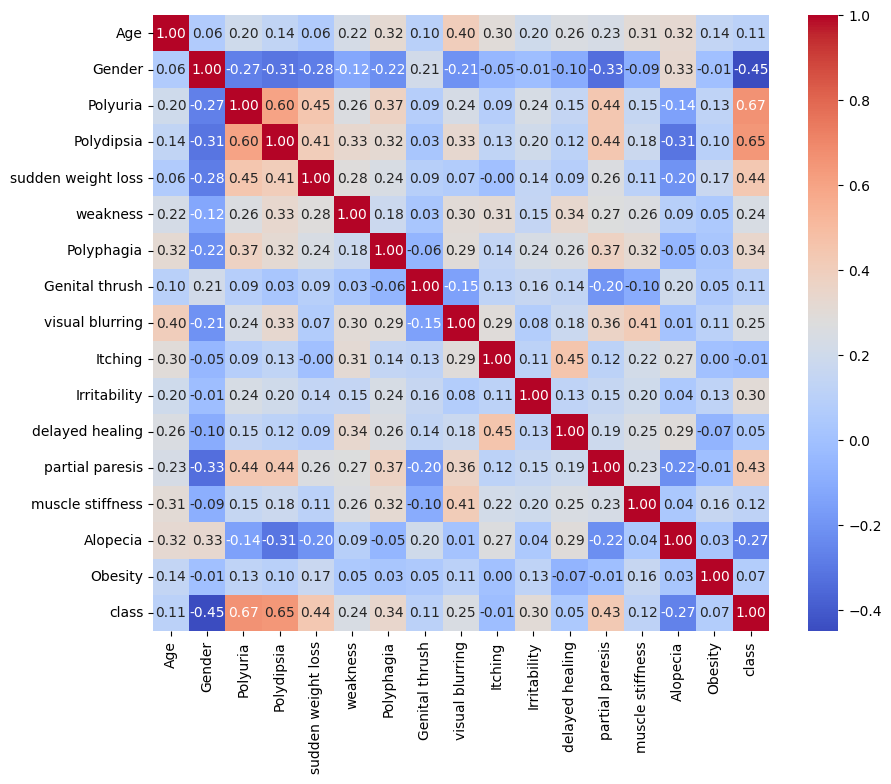

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", ax=ax, cmap="coolwarm", square=True)
plt.show()

In [7]:
X = df.drop(['class'],axis=1)
y = df['class']

In [8]:
from sklearn.feature_selection import chi2
chi_scores = chi2(X, y)[0]
p_values = chi2(X, y)[1]

# create a dataframe with chi-squared scores and p-values
chi_df = pd.DataFrame({'Feature': X.columns, 'Chi-squared Score': chi_scores, 'p-value': p_values})

# sort the dataframe by chi-squared score in descending order
chi_df = chi_df.sort_values(by='Chi-squared Score', ascending=False)

chi_df.head(17)

,Feature,Chi-squared Score,p-value
3,Polydipsia,120.785515,4.257624e-28
2,Polyuria,116.184593,4.330532e-27
4,sudden weight loss,57.749309,2.977447e-14
12,partial paresis,55.314286,1.027193e-13
1,Gender,38.747637,4.822937e-10
10,Irritability,35.334127,2.777228e-09
6,Polyphagia,33.198418,8.321822e-09
14,Alopecia,24.402793,7.815529e-07
0,Age,18.845767,1.417253e-05
8,visual blurring,18.124571,2.069141e-05


In [9]:
from sklearn.model_selection import train_test_split
X_dropped = df[['Polydipsia','Polyuria','sudden weight loss','partial paresis','Gender','Irritability','Polyphagia','Alopecia']]
X_dropped_train , X_dropped_test , y_train , y_test = train_test_split(X_dropped,y,test_size=0.2,random_state=17,shuffle=True)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix , classification_report
from sklearn.model_selection import KFold , cross_val_score
from numpy import mean
from numpy import std

In [11]:
#with dropping features
rf = RandomForestClassifier()
cv = KFold(n_splits=5, random_state=1, shuffle=True)

scores = cross_val_score(rf, X_dropped_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy : '+ str(mean(scores))+' Std Deviation :'+str(std(scores)))
print(scores)

Accuracy : 0.9437984325654337 Std Deviation :0.017860544956560157
[0.97247706 0.93069307 0.94845361 0.94736842 0.92      ]


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators':[10,50,100,150,200,250],'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2']}]

clf = GridSearchCV(rf,parameters,scoring='f1')
clf.fit(X_dropped_train,y_train)

In [13]:
y_pred = clf.predict(X_dropped_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        45
           1       0.97      1.00      0.98        59

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



In [14]:
#without dropping featues
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=17,shuffle=True)

In [15]:
rf2 = RandomForestClassifier()
cv = KFold(n_splits=5, random_state=1, shuffle=True)

scores = cross_val_score(rf2, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy : '+ str(mean(scores))+' Std Deviation :'+str(std(scores)))
print(scores)

Accuracy : 0.9847330178554561 Std Deviation :0.004335895075150732
[0.98113208 0.98039216 0.99009901 0.98214286 0.98989899]


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators':[10,50,100,150,200,250],'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2']}]

clf = GridSearchCV(rf,parameters,scoring='f1')
clf.fit(X_train,y_train)

In [17]:
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.98      1.00      0.99        59

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



In [18]:
cm = confusion_matrix(y_test,clf.predict(X_test))
cm

array([[44,  1],
       [ 0, 59]])